# Decision Tree

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics  module for accuracy calculation

In [2]:
# Load the dataset
import sklearn.datasets as datasets
iris=datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Dataframe formation
iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# Null check
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
# target attribute
iris_df['target']=iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


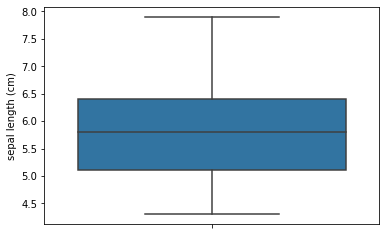

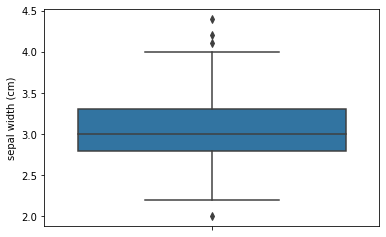

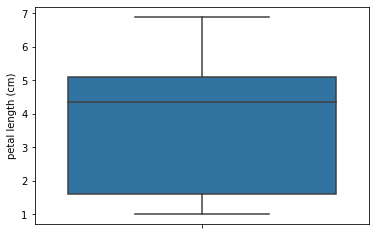

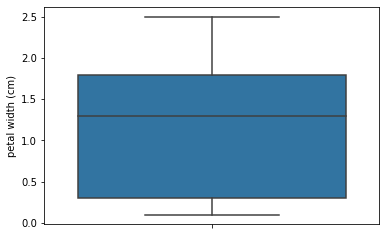

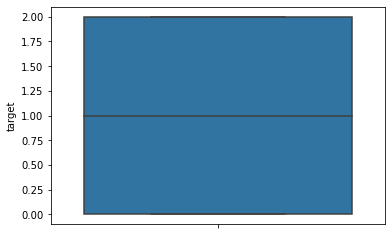

In [8]:
# Box plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cols = iris_df.columns
for i in cols:
    sns.boxplot(y=iris_df[i])
    plt.show()

In [9]:
# Remove the outliers from sepal width
q1 = iris_df['sepal width (cm)'].quantile(0.25)
q3 = iris_df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
iris_df = iris_df[(iris_df['sepal width (cm)'] >= q1-1.5*iqr) & (iris_df['sepal width (cm)'] <= q3+1.5*iqr)]
iris_df.shape

(146, 5)

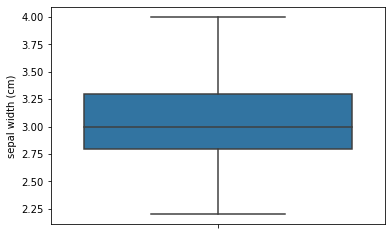

In [10]:
sns.boxplot(y=iris_df['sepal width (cm)'])
plt.show()

In [11]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [12]:
X=iris_df.drop('target',axis=1) # Dataframe features
y=iris_df['target'] # Target

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [14]:
# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

In [15]:
#Predict the response for test dataset
y_pred = dtc.predict(X_test)

In [16]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9545454545454546


In [17]:
# Install required libraries
#!pip install graphviz
#!pip install pydotplus

In [18]:
from sklearn.tree import export_graphviz # For display the tree within a Jupyter notebook, it converts decision tree classifier into dot file
import mglearn
from six import StringIO  
from IPython.display import Image  
import os
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image  
import pydotplus # convert this dot file to png or displayable form on Jupyter

In [20]:
#!pip install mglearn
#!pip install graphviz

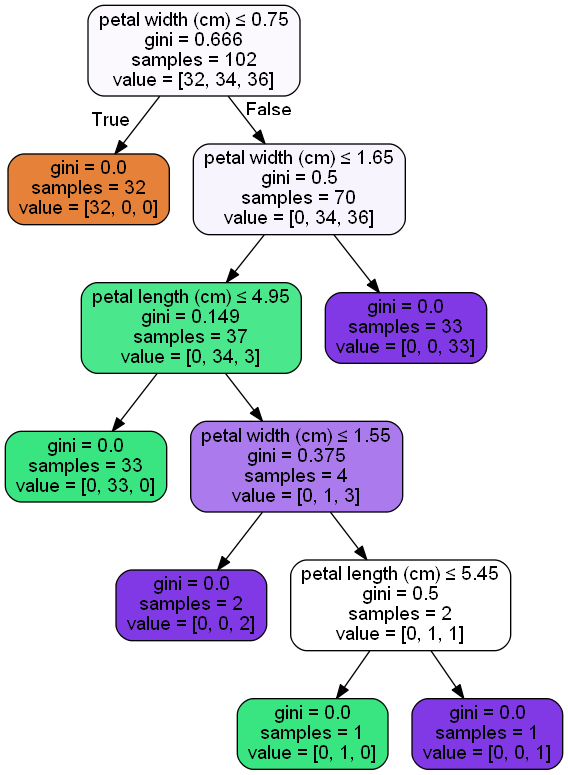

In [19]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())